# Testing random images from the internet

I thought of writing a script via Beautiful Soup to extract images but Google images seems to have changed its storage syntax twice in a span of a year and a half, so, for now I'll just use a simple Chrome extension that downloads random images to see further improvements.

The Chrome extension I downloaded: https://chrome.google.com/webstore/detail/image-downloader/cnpniohnfphhjihaiiggeabnkjhpaldj

In [51]:
import os
import shutil
import random
import numpy as np
from keras.preprocessing import image
from keras import models
from IPython.display import Image
from keras.applications.inception_v3 import preprocess_input as p1
from keras.applications.mobilenet import preprocess_input as p2
from keras.applications.mobilenet_v2 import preprocess_input as p3

Loading all 3 models: inception v3, mobilenet, and mobilenet_v3

In [46]:
os.chdir(r'C:\Users\Harshinee Sriram\OneDrive\Desktop\Wikimedia\NSFW classifier\Jupyter notebooks')

model_inception = models.load_model('model_InceptionV3.h5')
model_mobile =  models.load_model('model_MobileNet.h5')
model_mobile2 = models.load_model('model_MobileNet_V2.h5')

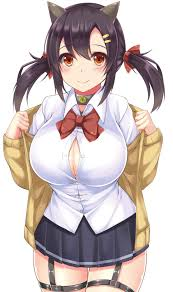

This is a SFW image


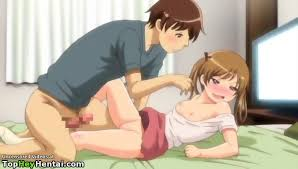

This is a SFW image


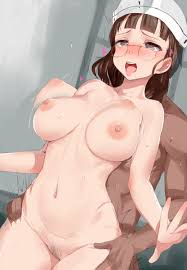

This is an NSFW image


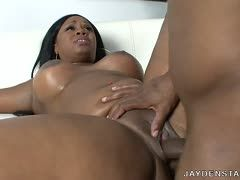

This is an NSFW image


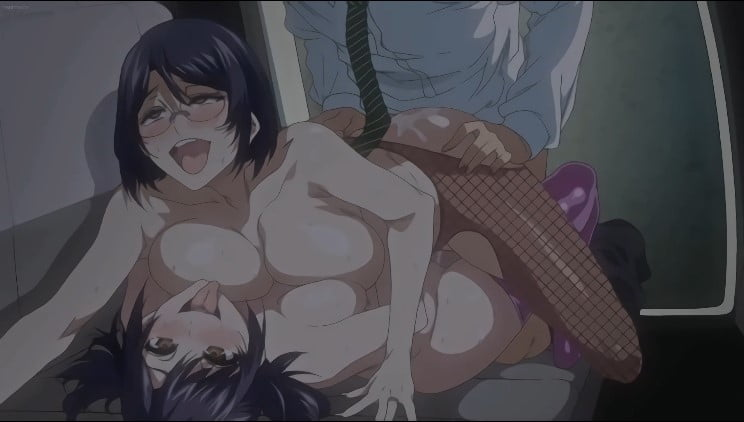

This is a SFW image


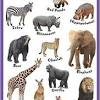

This is a SFW image


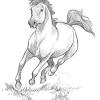

This is a SFW image


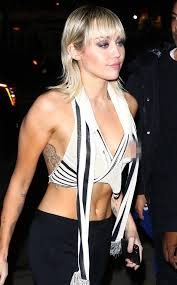

This is a SFW image


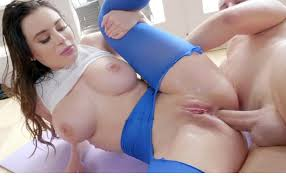

This is an NSFW image


In [75]:
os.chdir(r'D:\\Data\\Test_Any\\')

number_of_random_images = 0
all_imgs = []

for images_folder in os.listdir(os.getcwd()):
    all_imgs.append(images_folder)

img_list = []

while (number_of_random_images<9):
    img_list.append(random.choice(os.listdir(os.getcwd())))
    number_of_random_images = number_of_random_images + 1

for test_img in all_imgs:
    #display(Image(filename=test_img, height=100, width=100))
    display(Image(test_img))
    img = image.load_img(test_img, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = p1(img)
    yhat = model_mobile.predict(img)
    if(np.argmax(yhat) == 0):
        print("This is an NSFW image")
    else:
        print("This is a SFW image")   

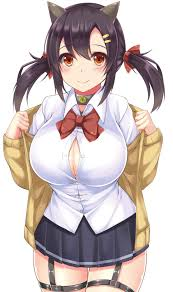

This is a SFW image


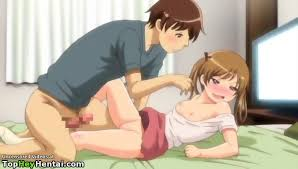

This is a SFW image


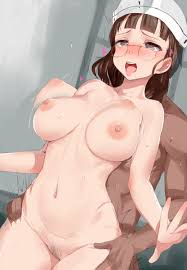

This is an NSFW image


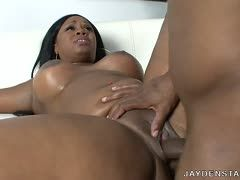

This is an NSFW image


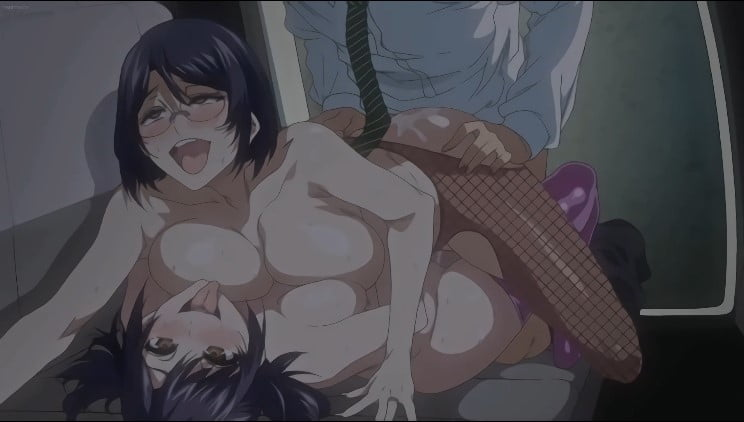

This is a SFW image


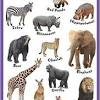

This is a SFW image


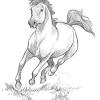

This is a SFW image


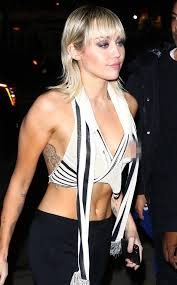

This is a SFW image


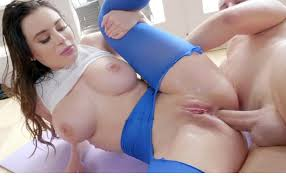

This is an NSFW image


In [76]:
os.chdir(r'D:\\Data\\Test_Any\\')

number_of_random_images = 0
all_imgs = []

for images_folder in os.listdir(os.getcwd()):
    all_imgs.append(images_folder)

img_list = []

while (number_of_random_images<9):
    img_list.append(random.choice(os.listdir(os.getcwd())))
    number_of_random_images = number_of_random_images + 1

for test_img in all_imgs:
    #display(Image(filename=test_img, height=100, width=100))
    display(Image(test_img))
    img = image.load_img(test_img, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = p2(img)
    yhat = model_mobile.predict(img)
    if(np.argmax(yhat) == 0):
        print("This is an NSFW image")
    else:
        print("This is a SFW image")   

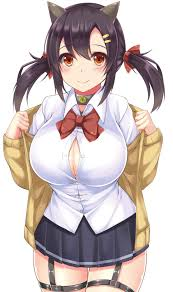

This is a SFW image


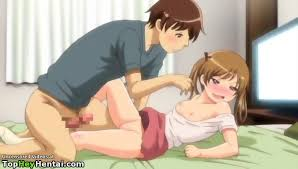

This is a SFW image


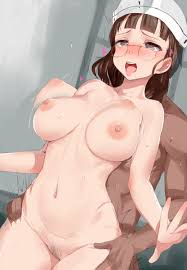

This is an NSFW image


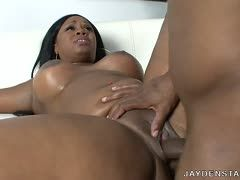

This is an NSFW image


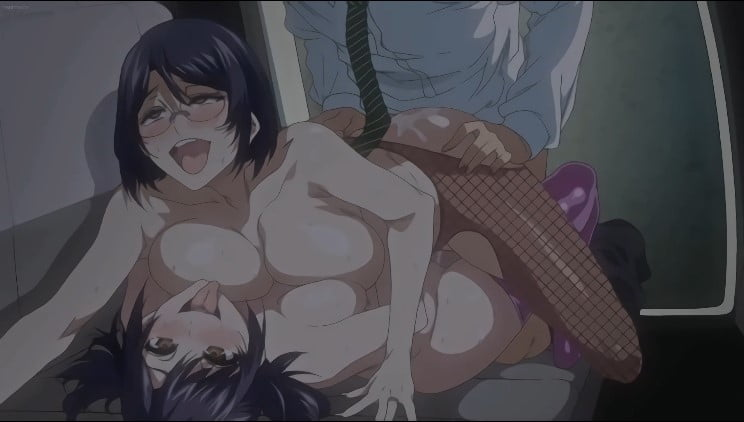

This is a SFW image


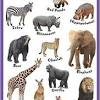

This is a SFW image


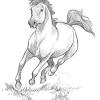

This is a SFW image


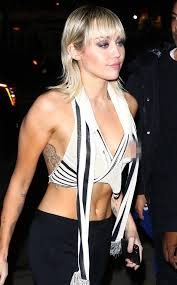

This is an NSFW image


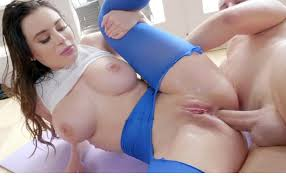

This is an NSFW image


In [77]:
os.chdir(r'D:\\Data\\Test_Any\\')

number_of_random_images = 0
all_imgs = []

for images_folder in os.listdir(os.getcwd()):
    all_imgs.append(images_folder)

img_list = []

while (number_of_random_images<9):
    img_list.append(random.choice(os.listdir(os.getcwd())))
    number_of_random_images = number_of_random_images + 1

for test_img in all_imgs:
    #display(Image(filename=test_img, height=100, width=100))
    display(Image(test_img))
    img = image.load_img(test_img, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = p3(img)
    yhat = model_mobile2.predict(img)
    if(np.argmax(yhat) == 0):
        print("This is an NSFW image")
    else:
        print("This is a SFW image")   

# Inferences

- Need more NSFW and SFW content which are monochrome and/or low lighting
- Need more NSFW content where the images are partially blurred (as in the second test image)
- Seems to detect NSFW content even if the people are not Caucasian (despite the dataset being predominantly Caucasian) - need to run more tests to determine
- Inception V3 and MobileNet classify the second last test image (Miley Cyrus) as SFW whereas MobileNet_V2 classifies it as NSFW. The extent of SFW content (which has to be discussed) will determine which output is more favourable